# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [1]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries
import numpy as np
import pandas as pd
import math

### **1.1 Load the Data**

In [3]:
# Load the dataset
emp_df = pd.read_csv('Employee_data.csv')

In [4]:
# Check the first few entries
emp_df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [5]:
# Inspect the shape of the dataset
emp_df.shape

(74610, 24)

In [6]:
# Inspect the different columns in the dataset
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

### **1.2 Check the basic statistics**

In [7]:
# Check the summary of the dataset
emp_df.describe()


,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
count,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000,72698.000000,74610.000000,72197.000000
mean,37246.028696,38.529379,15.722638,7344.931417,0.832958,49.990839,1.657432,55.711899
std,21505.785344,12.082299,11.224059,2596.373589,0.995326,28.519135,1.579862,25.392325
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18624.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37239.500000,39.000000,13.000000,7348.500000,1.000000,50.000000,1.000000,56.000000
75%,55871.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,50030.000000,4.000000,99.000000,15.000000,128.000000


### **1.3 Check the data type of columns**

In [8]:
# Check the info to see the types of the feature variables and the null values present
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

In [9]:
emp_df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [10]:
# Check the number of missing values in each column
emp_df.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [11]:
# Check the percentage of missing values in each column
round(100*emp_df.isnull().sum() / len(emp_df),2)

Employee ID                   0.00
Age                           0.00
Gender                        0.00
Years at Company              0.00
Job Role                      0.00
Monthly Income                0.00
Work-Life Balance             0.00
Job Satisfaction              0.00
Performance Rating            0.00
Number of Promotions          0.00
Overtime                      0.00
Distance from Home            2.56
Education Level               0.00
Marital Status                0.00
Number of Dependents          0.00
Job Level                     0.00
Company Size                  0.00
Company Tenure (In Months)    3.23
Remote Work                   0.00
Leadership Opportunities      0.00
Innovation Opportunities      0.00
Company Reputation            0.00
Employee Recognition          0.00
Attrition                     0.00
dtype: float64

In [12]:
# Check skewness for all numerical features
emp_df.select_dtypes(include=['int64', 'float64']).skew()

Employee ID                   0.000362
Age                          -0.001581
Years at Company              0.789669
Monthly Income                5.204232
Number of Promotions          0.992753
Distance from Home            0.001752
Number of Dependents          0.917853
Company Tenure (In Months)    0.066104
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [13]:
# Handle the missing value rows in the column
# Data is symmetric, impute with mean

emp_df['Distance from Home'].fillna(emp_df['Distance from Home'].mean(), inplace=True)
emp_df['Company Tenure (In Months)'].fillna(emp_df['Company Tenure (In Months)'].mean(), inplace=True)

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [14]:
# Check the percentage of remaining data after missing values are removed
round(100*emp_df.isnull().sum() / len(emp_df),2)

Employee ID                   0.0
Age                           0.0
Gender                        0.0
Years at Company              0.0
Job Role                      0.0
Monthly Income                0.0
Work-Life Balance             0.0
Job Satisfaction              0.0
Performance Rating            0.0
Number of Promotions          0.0
Overtime                      0.0
Distance from Home            0.0
Education Level               0.0
Marital Status                0.0
Number of Dependents          0.0
Job Level                     0.0
Company Size                  0.0
Company Tenure (In Months)    0.0
Remote Work                   0.0
Leadership Opportunities      0.0
Innovation Opportunities      0.0
Company Reputation            0.0
Employee Recognition          0.0
Attrition                     0.0
dtype: float64

### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [15]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def check_redundancy(emp_df):
    cat_cols = emp_df.select_dtypes(include=['object','category']).columns
    
    for col in cat_cols:
        print('Column :'+col)
        print(emp_df[col].unique())
        print('-'*40)
check_redundancy(emp_df)

Column :Gender
['Male' 'Female']
----------------------------------------
Column :Job Role
['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
----------------------------------------
Column :Work-Life Balance
['Excellent' 'Poor' 'Good' 'Fair']
----------------------------------------
Column :Job Satisfaction
['Medium' 'High' 'Very High' 'Low']
----------------------------------------
Column :Performance Rating
['Average' 'Low' 'High' 'Below Average']
----------------------------------------
Column :Overtime
['No' 'Yes']
----------------------------------------
Column :Education Level
['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']
----------------------------------------
Column :Marital Status
['Married' 'Divorced' 'Single']
----------------------------------------
Column :Job Level
['Mid' 'Senior' 'Entry']
----------------------------------------
Column :Company Size
['Medium' 'Small' 'Large']
----------------------------------------
Column :

In [16]:
# Check the data
emp_df['Education Level'] = emp_df['Education Level'].replace(
    {'Masterâ€™s Degree': "Master's Degree"}
)

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [17]:
emp_df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [18]:
# Drop redundant columns which are not required for modelling
#Drop Unique Identifiers
emp_df.drop(columns=['Employee ID'], inplace=True)


In [19]:
emp_df.drop(columns=['Company Tenure (In Months)'], inplace=True)

Numerical Correlation Matrix:

                       Age  Years at Company  Monthly Income  \
Age                   1.00              0.54           -0.00   
Years at Company      0.54              1.00           -0.01   
Monthly Income       -0.00             -0.01            1.00   
Number of Promotions  0.00              0.00            0.00   
Distance from Home   -0.00             -0.00           -0.00   
Number of Dependents  0.00              0.01           -0.00   

                      Number of Promotions  Distance from Home  \
Age                                   0.00               -0.00   
Years at Company                      0.00               -0.00   
Monthly Income                        0.00               -0.00   
Number of Promotions                  1.00               -0.01   
Distance from Home                   -0.01                1.00   
Number of Dependents                 -0.00               -0.00   

                      Number of Dependents  
Age         

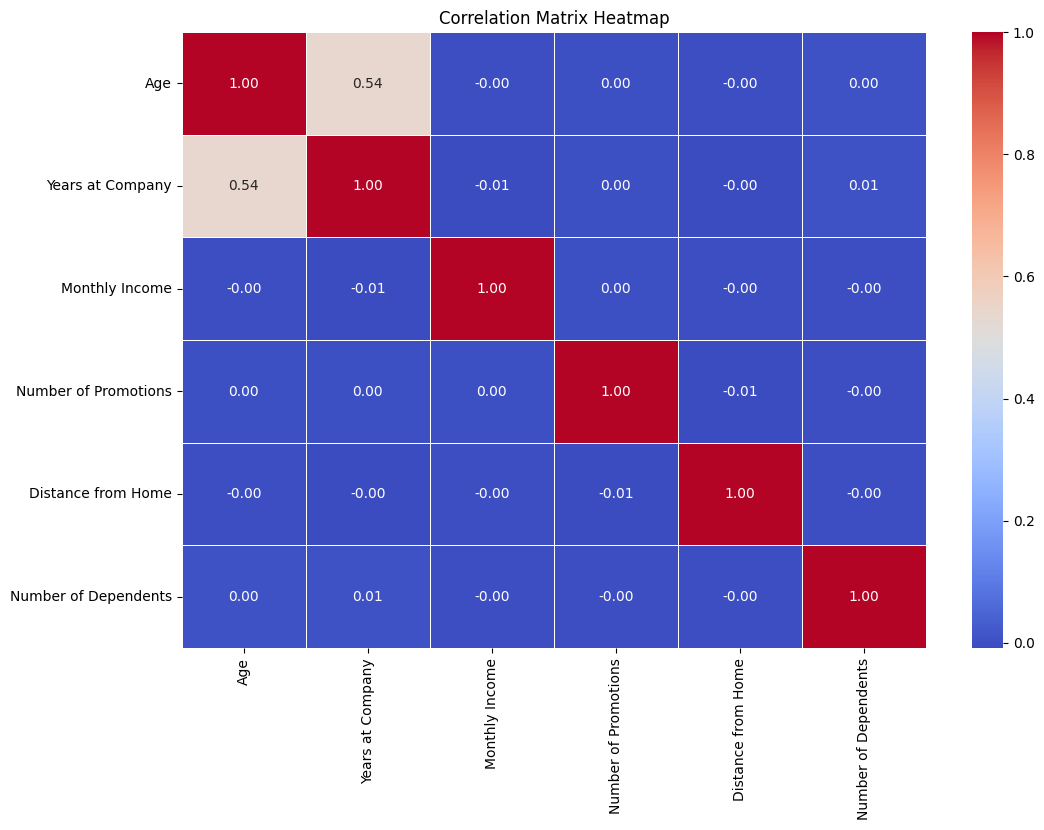

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = emp_df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Print the correlation matrix
print("Numerical Correlation Matrix:\n")
print(corr_matrix.round(2))  # Rounded for easier reading

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [21]:
# Check first few rows of data
emp_df.head(25)

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Marital Status,Number of Dependents,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,...,Married,0,Mid,Medium,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3,No,...,Divorced,3,Mid,Medium,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,...,Married,3,Mid,Medium,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1,No,...,Single,2,Mid,Small,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,...,Divorced,0,Senior,Medium,No,No,No,Fair,Medium,Stayed
5,38,Female,3,Technology,9977,Fair,High,Below Average,3,No,...,Married,0,Mid,Medium,No,No,Yes,Fair,High,Left
6,47,Male,23,Education,3681,Fair,High,High,1,Yes,...,Divorced,3,Entry,Small,No,No,No,Good,Medium,Left
7,48,Male,16,Finance,11223,Excellent,Very High,High,2,No,...,Married,4,Entry,Medium,No,No,No,Excellent,Low,Stayed
8,57,Male,44,Education,3773,Good,Medium,High,1,Yes,...,Married,4,Entry,Medium,No,No,No,Fair,Medium,Stayed
9,24,Female,1,Healthcare,7319,Poor,High,Average,1,Yes,...,Single,4,Entry,Large,No,No,Yes,Good,Low,Left


## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [22]:
# Import Train Test Split
from sklearn.model_selection import train_test_split


### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [23]:


# Put the target variable in y
y = emp_df['Attrition'].map({'Stayed': 0, 'Left': 1})


In [24]:
# Put all the feature variables in X
X = emp_df.drop(columns=['Attrition'])

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [25]:
# Split the data into 70% train data and 30% validation data
x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 70)


## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [26]:
# Select numerical columns
numerical_cols = x_train.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents'],
      dtype='object')


4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

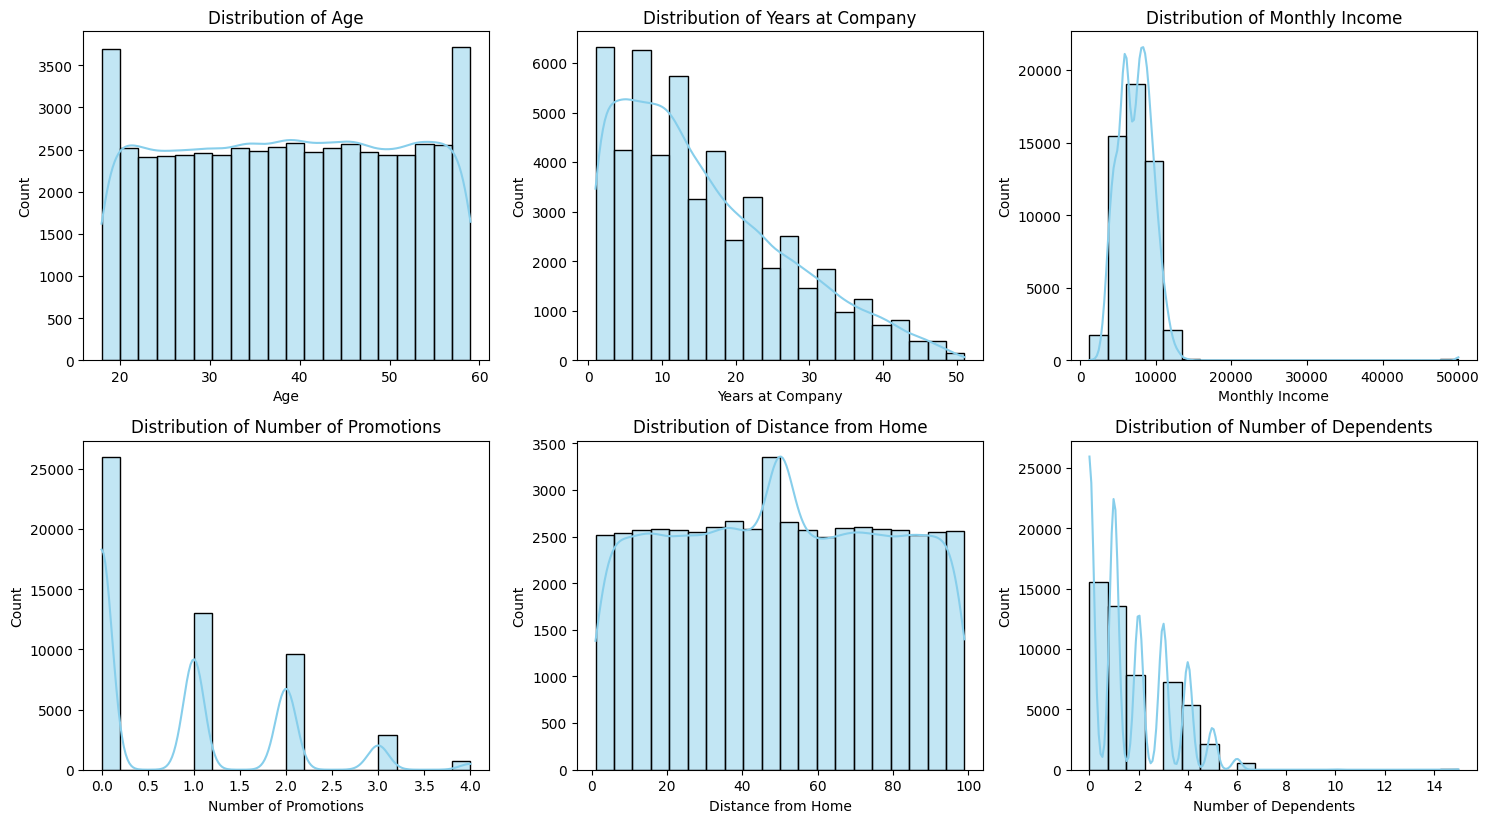

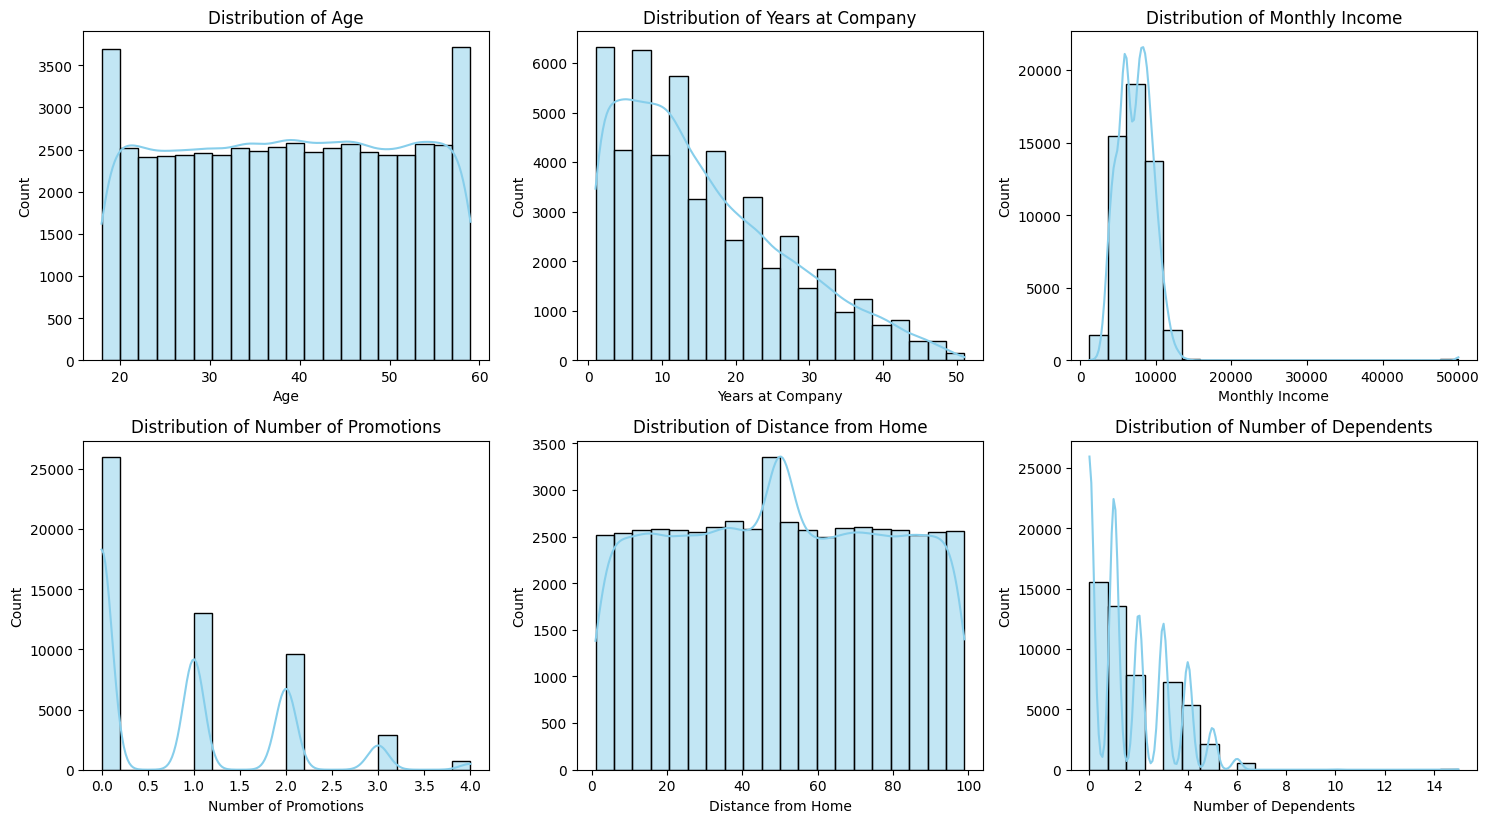

In [27]:
# Plot all the numerical columns to understand their distribution

plt.figure(figsize=(15, 12))  

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1) 
    sns.histplot(x_train[col], kde=True, color='skyblue', bins=20)  # Histogram + KDE
    plt.title(f'Distribution of {col}')
    plt.tight_layout()  

plt.show()


import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 12))  

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(x_train[col], kde=True, color='skyblue', bins=20)  # Histogram + KDE
    plt.title(f'Distribution of {col}')
    plt.tight_layout()  

plt.show()



### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

Correlation Matrix (Numerical Columns):

                       Age  Years at Company  Monthly Income  \
Age                   1.00              0.54           -0.01   
Years at Company      0.54              1.00           -0.01   
Monthly Income       -0.01             -0.01            1.00   
Number of Promotions  0.00              0.00            0.00   
Distance from Home   -0.00             -0.01           -0.00   
Number of Dependents  0.00              0.00           -0.00   

                      Number of Promotions  Distance from Home  \
Age                                   0.00               -0.00   
Years at Company                      0.00               -0.01   
Monthly Income                        0.00               -0.00   
Number of Promotions                  1.00               -0.01   
Distance from Home                   -0.01                1.00   
Number of Dependents                 -0.00               -0.00   

                      Number of Dependents  
Ag

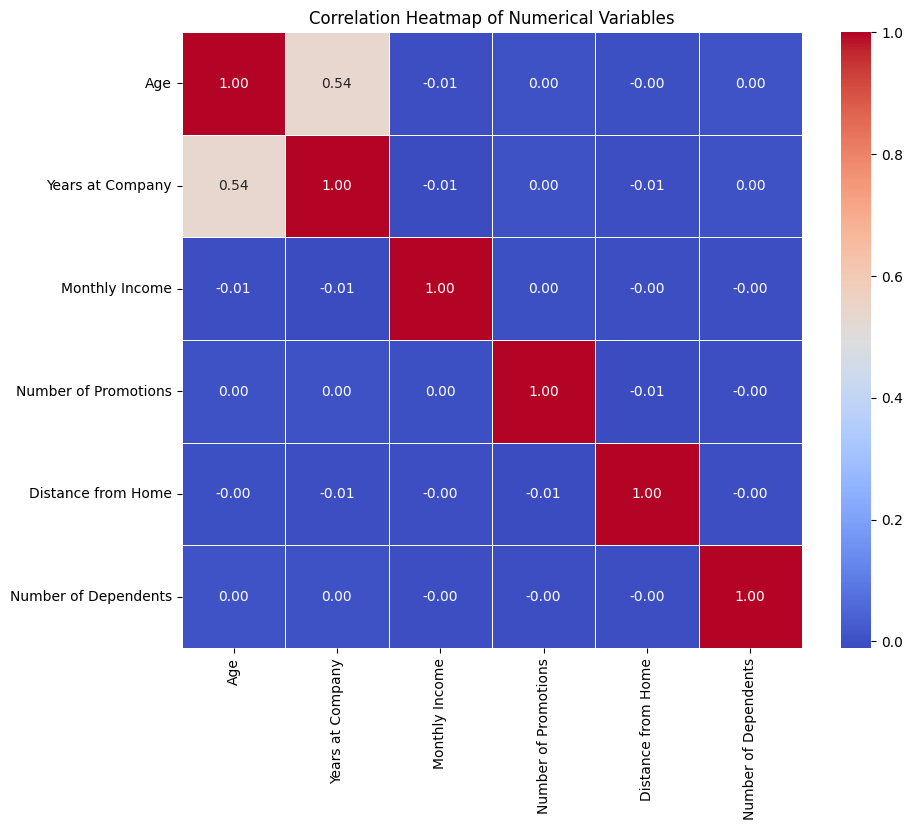

In [28]:
# Create correlation matrix for numerical columns

corr_matrix = x_train[numerical_cols].corr()


print("Correlation Matrix (Numerical Columns):\n")
print(corr_matrix.round(2))  # Round for easier reading


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()



### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

Class Distribution (Target Variable - Attrition):
 Attrition
0    27550
1    24677
Name: count, dtype: int64


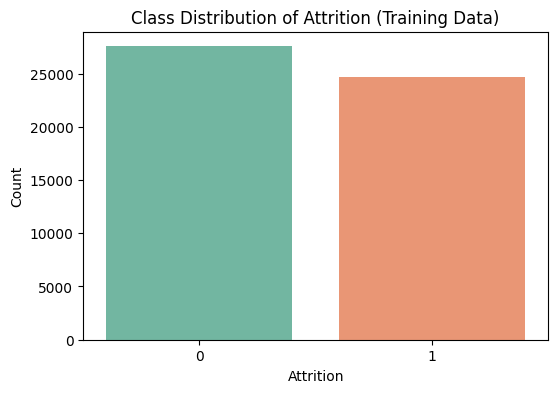

In [29]:
# Plot a bar chart to check class balance

class_distribution = y_train.value_counts()


print("Class Distribution (Target Variable - Attrition):\n", class_distribution)

plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette='Set2')
plt.title('Class Distribution of Attrition (Training Data)')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()



### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

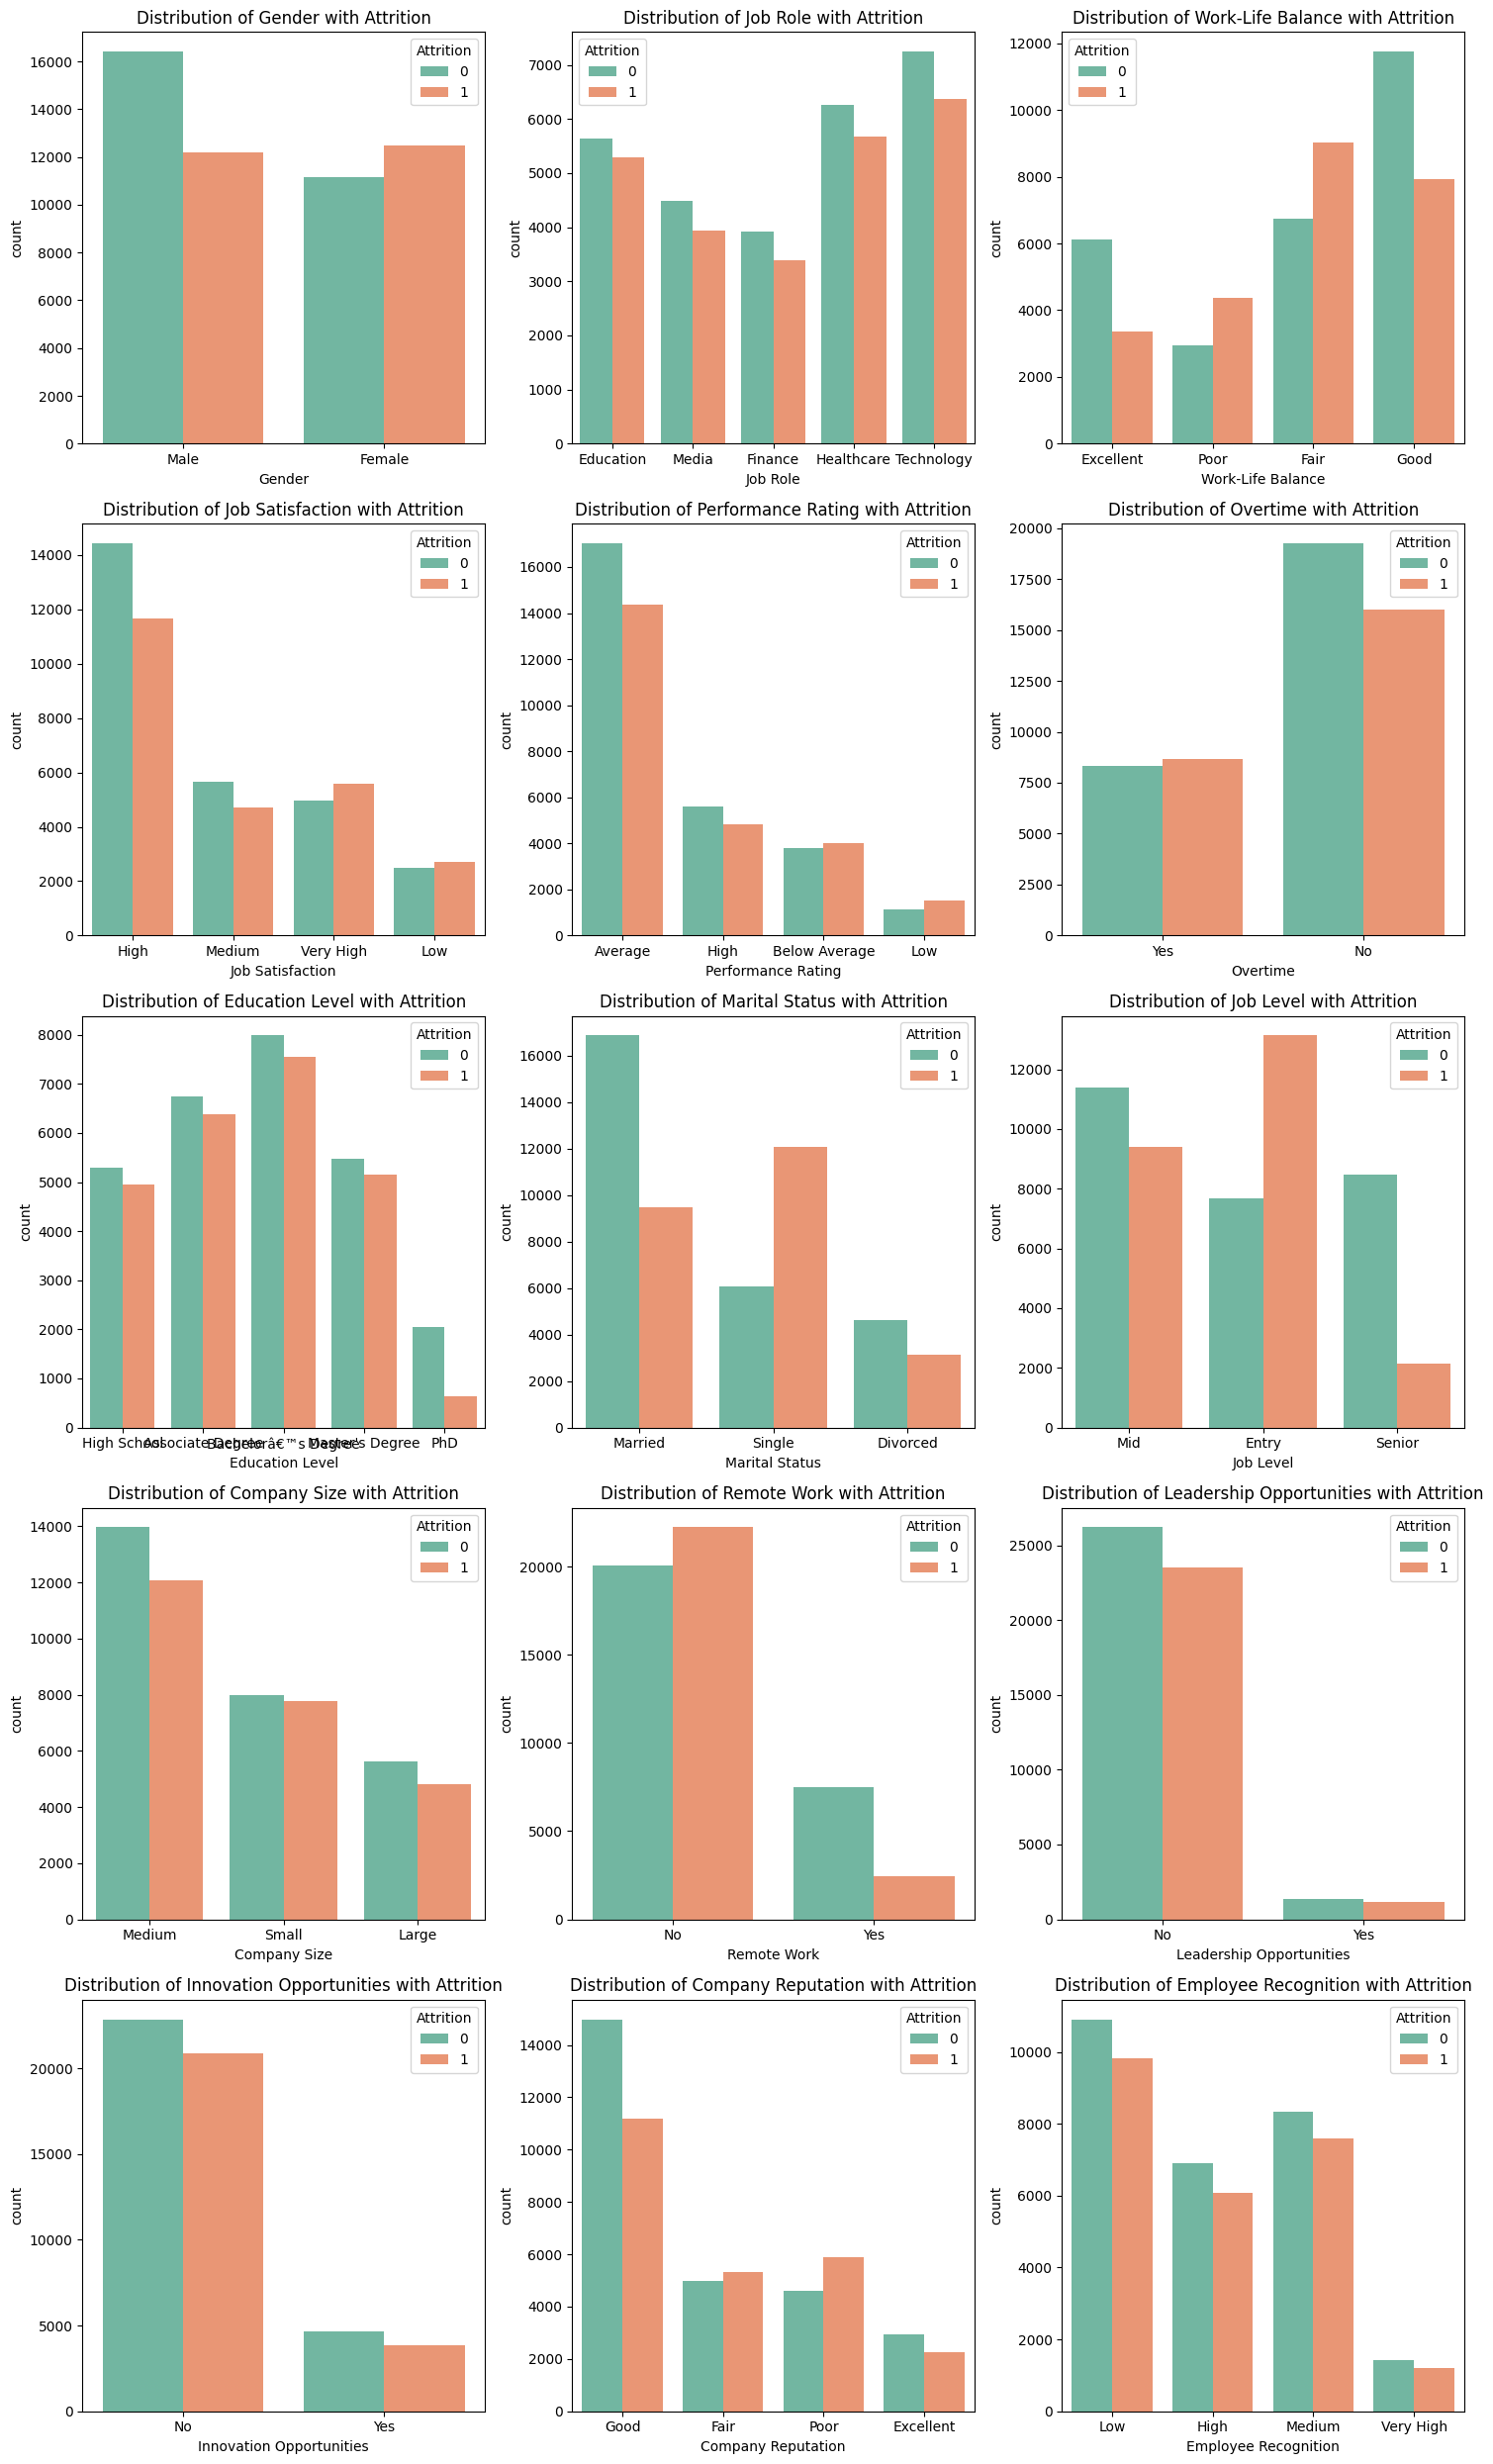

In [30]:
# Plot distribution for each categorical column with target variable



cat_cols = x_train.select_dtypes(include=['object', 'category']).columns


n_cols = 3 
n_rows = math.ceil(len(cat_cols) / n_cols)  


plt.figure(figsize=(n_cols * 5, n_rows * 5))  

for i, col in enumerate(cat_cols):
    plt.subplot(n_rows, n_cols, i + 1)  # Adjust subplot grid dynamically
    sns.countplot(x=col, hue=y_train, data=x_train, palette='Set2')  # Countplot with target hue
    plt.title(f'Distribution of {col} with Attrition')
    plt.tight_layout() 

plt.show()



## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [31]:
# Select numerical columns
# Select numerical columns from validation data (x_test)
num_cols_validation = x_test.select_dtypes(include=['int64', 'float64']).columns

# Print the selected numerical columns to check
print(num_cols_validation)



Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents'],
      dtype='object')


5.1.2 Plot distribution of numerical columns

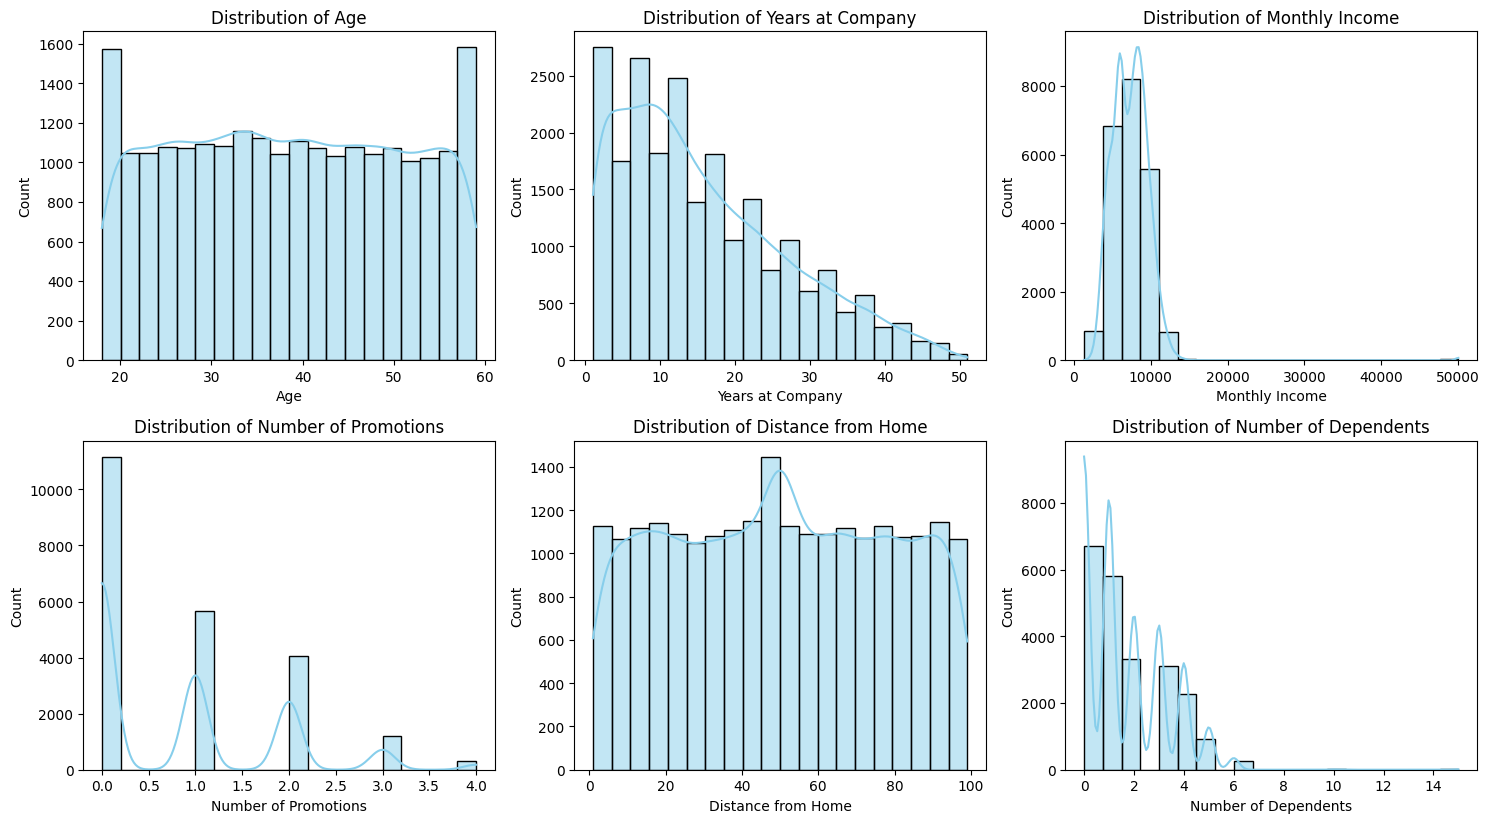

In [32]:
# Plot all the numerical columns to understand their distribution

import seaborn as sns
import matplotlib.pyplot as plt


num_cols_validation = x_test.select_dtypes(include=['int64', 'float64']).columns

# Plot the distribution for each numerical column in validation data
plt.figure(figsize=(15, 12))  # Adjust the figure size

for i, col in enumerate(num_cols_validation):
    plt.subplot(3, 3, i+1)  # Create a 3x3 grid of subplots (adjust this as needed)
    sns.histplot(x=x_test[col], kde=True, color='skyblue', bins=20)  # Plot histogram with KDE
    plt.title(f'Distribution of {col}')
    plt.tight_layout()  # Adjust layout to avoid overlap

plt.show()


### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

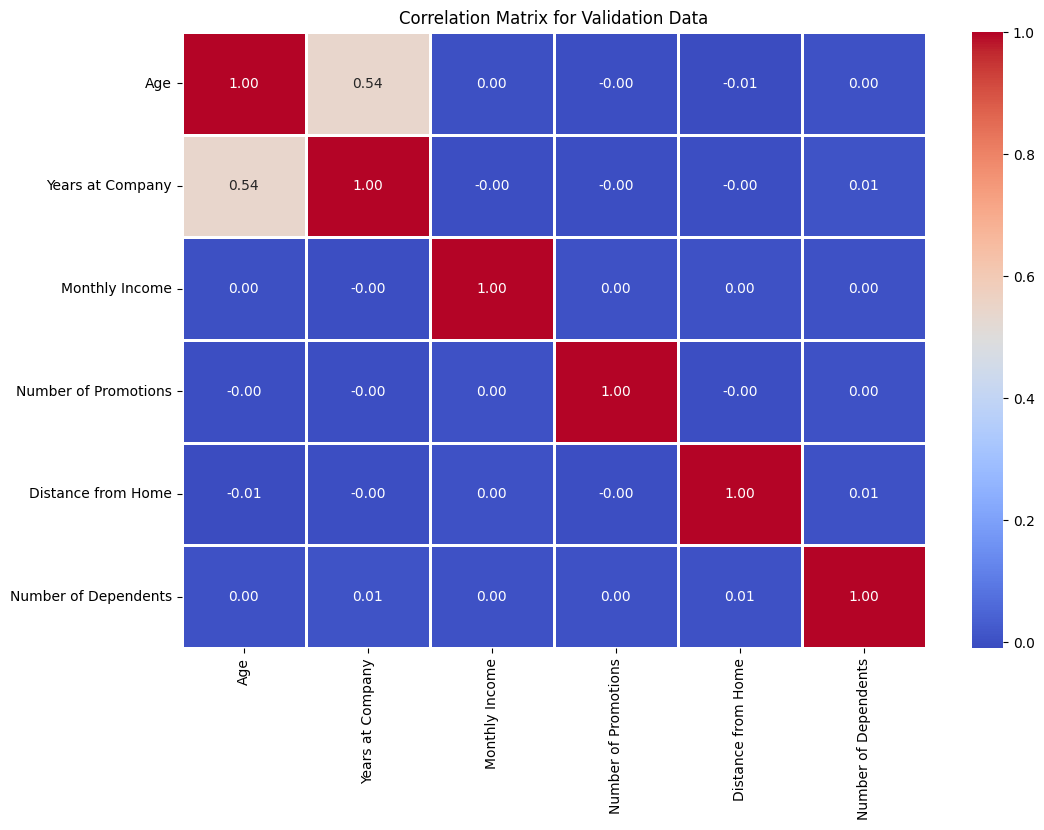

In [33]:
# Create correlation matrix for numerical columns



num_cols_validation = x_test.select_dtypes(include=['int64', 'float64']).columns


corr_matrix_validation = x_test[num_cols_validation].corr()


plt.figure(figsize=(12, 8))  
sns.heatmap(corr_matrix_validation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, cbar=True)
plt.title("Correlation Matrix for Validation Data")
plt.show()


### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

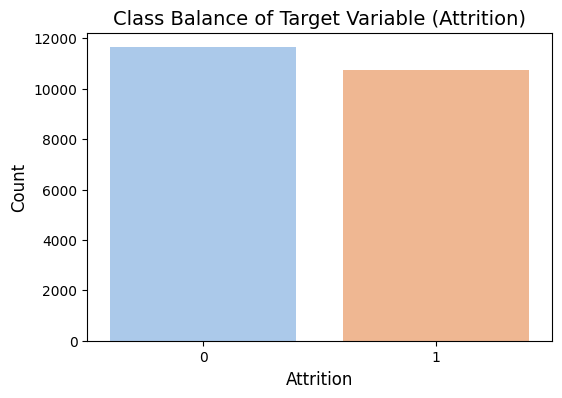

In [34]:
# Plot a bar chart to check class balance


plt.figure(figsize=(6, 4)) 
sns.countplot(x=y_test, palette='pastel')


plt.title('Class Balance of Target Variable (Attrition)', fontsize=14)
plt.xlabel('Attrition', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

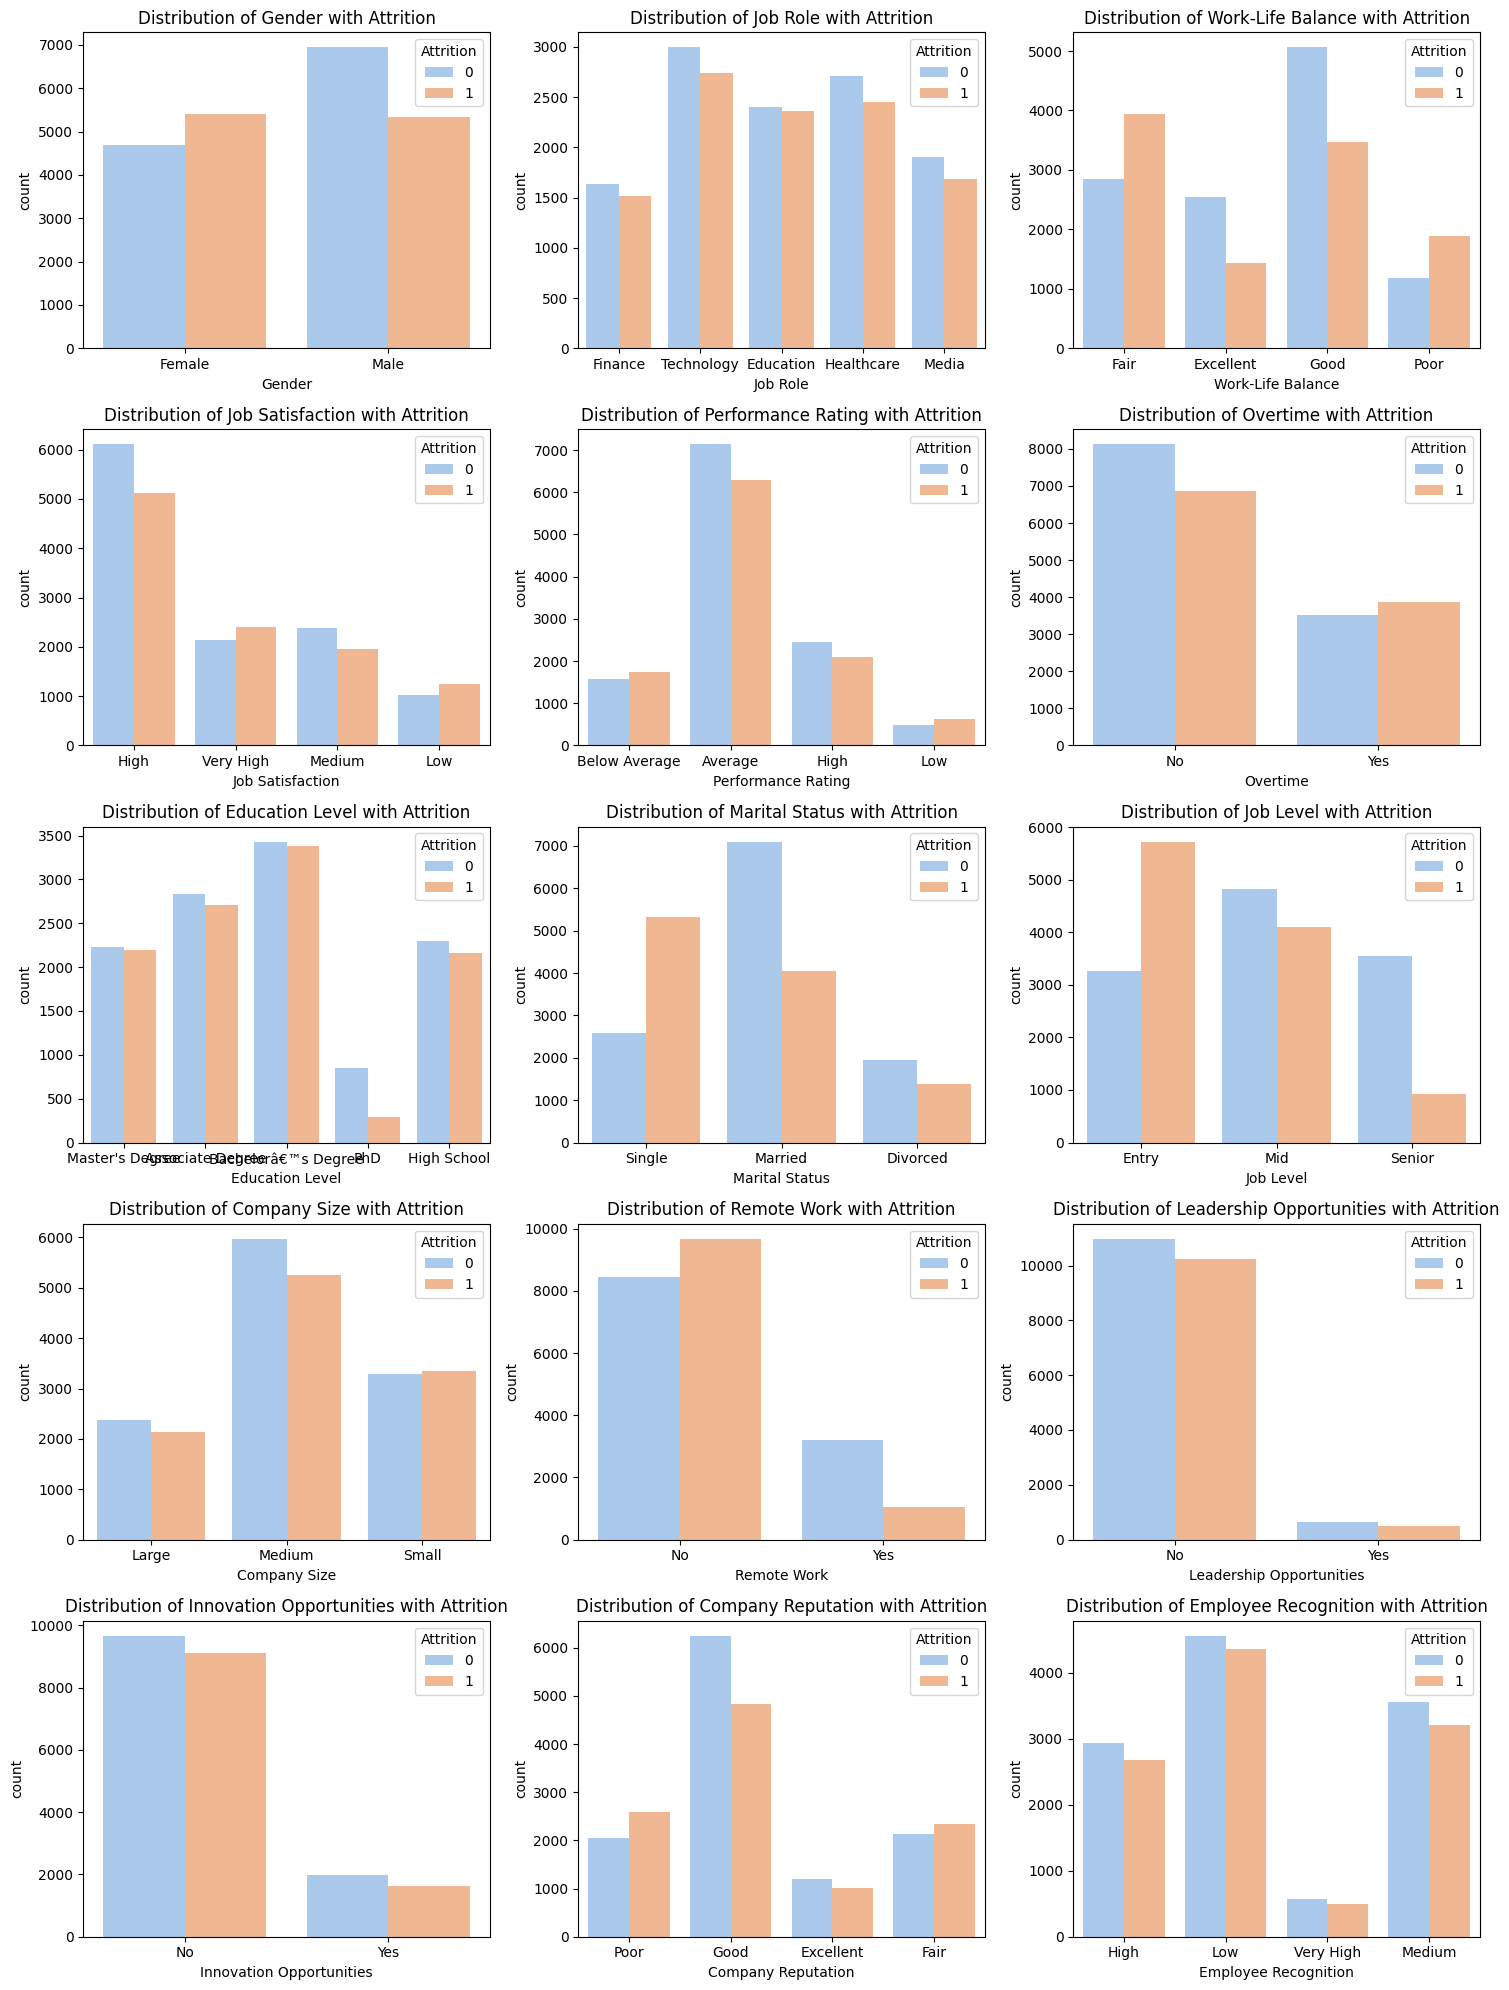

In [35]:
# Plot distribution for each categorical column with target variable

import math


cat_cols_validation = x_test.select_dtypes(include=['object', 'category']).columns


num_cols = 3 
num_rows = math.ceil(len(cat_cols_validation) / num_cols)  


plt.figure(figsize=(15, 4 * num_rows))  

for i, col in enumerate(cat_cols_validation):
    plt.subplot(num_rows, num_cols, i + 1) 
    sns.countplot(x=col, hue=y_test, data=x_test, palette='pastel')  
    plt.title(f'Distribution of {col} with Attrition')
    plt.tight_layout()  

plt.show()



## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [36]:
# Check the categorical columns

cat_cols_train = x_train.select_dtypes(include=['object', 'category']).columns
print("Categorical columns in training data that require dummy variables:")
print(cat_cols_train.tolist())

cat_cols_test = x_test.select_dtypes(include=['object', 'category']).columns
print("\nCategorical columns in test data that require dummy variables:")
print(cat_cols_test.tolist())



Categorical columns in training data that require dummy variables:
['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']

Categorical columns in test data that require dummy variables:
['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']


6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [37]:
# Create dummy variables using the 'get_dummies' for independent columns


x_train_encoded = pd.get_dummies(x_train, drop_first=True)

print("Shape after dummy variable creation (training set):", x_train_encoded.shape)
x_train_encoded.head()



Shape after dummy variable creation (training set): (52227, 40)


,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
52756,38,27,4501,1,7.0,6,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False
21602,51,32,6477,0,67.0,1,True,False,False,True,...,True,True,False,False,False,True,False,False,False,False
47211,31,5,10215,1,79.0,1,True,True,False,False,...,False,False,False,False,True,False,False,True,False,False
28988,18,2,8127,0,71.0,0,True,False,True,False,...,False,True,True,False,False,True,False,False,False,False
14270,54,36,7041,1,64.0,1,True,True,False,False,...,False,True,False,False,True,False,False,True,False,False


Now, drop the original categorical columns and check the DataFrame

In [38]:
# Drop the original categorical columns and check the DataFrame
#1:
cat_cols_train = x_train.select_dtypes(include=['object', 'category']).columns

#  2: 
x_train_nodups = x_train.drop(columns=cat_cols_train)

#3.
x_train_final = pd.concat([x_train_nodups, pd.get_dummies(x_train[cat_cols_train], drop_first=True)], axis=1)

#  4
print("Final shape of training data after dummy variable creation and dropping original categorical columns:")
print(x_train_final.shape)


x_train_final.head()


Final shape of training data after dummy variable creation and dropping original categorical columns:
(52227, 40)


,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
52756,38,27,4501,1,7.0,6,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False
21602,51,32,6477,0,67.0,1,True,False,False,True,...,True,True,False,False,False,True,False,False,False,False
47211,31,5,10215,1,79.0,1,True,True,False,False,...,False,False,False,False,True,False,False,True,False,False
28988,18,2,8127,0,71.0,0,True,False,True,False,...,False,True,True,False,False,True,False,False,False,False
14270,54,36,7041,1,64.0,1,True,True,False,False,...,False,True,False,False,True,False,False,True,False,False


6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [39]:
# Create dummy variables using the 'get_dummies' for independent columns

cat_cols_test = x_test.select_dtypes(include=['object', 'category']).columns

x_test_dummies = pd.get_dummies(x_test[cat_cols_test], drop_first=True)


x_test_numeric = x_test.drop(columns=cat_cols_test)

#Add the dummy variables to the master DataFrame
x_test_final = pd.concat([x_test_numeric, x_test_dummies], axis=1)


x_test_final = x_test_final.reindex(columns=x_train_final.columns, fill_value=0)

# Step 6: 
print("Dummy variables created and added to validation set.")
print("Final shape of x_test_final:", x_test_final.shape)
x_test_final.head()

# Add the results to the master DataFrame


Dummy variables created and added to validation set.
Final shape of x_test_final: (22383, 40)


,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
66816,44,30,5072,2,86.0,2,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
11915,22,8,9540,1,53.0,0,True,False,False,False,...,False,False,False,True,False,True,False,True,False,False
8851,22,8,5033,1,26.0,0,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
12287,51,6,6379,0,57.0,0,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
7332,39,2,11938,1,12.0,1,True,False,False,False,...,False,False,False,False,False,False,True,True,False,False


Now, drop the original categorical columns and check the DataFrame

In [40]:
# Drop categorical columns and check the DataFrame
# Step 1:
cat_cols_test = x_test.select_dtypes(include=['object', 'category']).columns

# Step 2: 
x_test_cleaned = x_test.drop(columns=cat_cols_test)

# Preview the cleaned DataFrame
print("Shape of x_test after dropping categorical columns:", x_test_cleaned.shape)
x_test_cleaned.head()


Shape of x_test after dropping categorical columns: (22383, 6)


,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents
66816,44,30,5072,2,86.0,2
11915,22,8,9540,1,53.0,0
8851,22,8,5033,1,26.0,0
12287,51,6,6379,0,57.0,0
7332,39,2,11938,1,12.0,1


6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [41]:
# Convert y_train and y_validation to DataFrame to create dummy variables

y_train_df = pd.DataFrame(y_train, columns=['Attrition'])
y_test_df = pd.DataFrame(y_test, columns=['Attrition'])


y_train_final = pd.get_dummies(y_train_df['Attrition'], drop_first=True)
y_test_final = pd.get_dummies(y_test_df['Attrition'], drop_first=True)


print("y_train_final shape:", y_train_final.shape)
print("y_test_final shape:", y_test_final.shape)
y_train_final.head()


y_train_final shape: (52227, 1)
y_test_final shape: (22383, 1)


,1
52756,False
21602,True
47211,False
28988,False
14270,False


6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [42]:
# Create dummy variables using the 'get_dummies' for dependent column

y_train_df = pd.DataFrame(y_train, columns=['Attrition'])


y_train_final = pd.get_dummies(y_train_df['Attrition'], drop_first=True)

print("Dummy variable for y_train created successfully.")
print("Shape of y_train_final:", y_train_final.shape)
y_train_final.head()


Dummy variable for y_train created successfully.
Shape of y_train_final: (52227, 1)


,1
52756,False
21602,True
47211,False
28988,False
14270,False


6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [43]:
# Create dummy variables using the 'get_dummies' for dependent column


6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [44]:
# Drop redundant columns from both train and validation

x_train_final = x_train_final.drop(columns=['Employee ID'], errors='ignore')
x_test_final = x_test_final.drop(columns=['Employee ID'], errors='ignore')

print("Redundant columns dropped.")
print("x_train_final shape:", x_train_final.shape)
print("x_test_final shape:", x_test_final.shape)


Redundant columns dropped.
x_train_final shape: (52227, 40)
x_test_final shape: (22383, 40)


### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [45]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [46]:
# Scale the numeric features present in the training set
# Scale the numerical features present in the validation set

numeric_cols = x_train_final.select_dtypes(include=['int64', 'float64']).columns


scaler = StandardScaler()

#  fitting scaler on training set, transform both train and test
x_train_final[numeric_cols] = scaler.fit_transform(x_train_final[numeric_cols])
x_test_final[numeric_cols] = scaler.transform(x_test_final[numeric_cols])


print("Numerical features scaled successfully.")
x_train_final.head()





Numerical features scaled successfully.


,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
52756,-0.048109,1.002888,-1.094626,0.166078,-1.529457,2.752691,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False
21602,1.026394,1.447886,-0.335121,-0.837364,0.604386,-0.416615,True,False,False,True,...,True,True,False,False,False,True,False,False,False,False
47211,-0.626688,-0.955102,1.101635,0.166078,1.031155,-0.416615,True,True,False,False,...,False,False,False,False,True,False,False,True,False,False
28988,-1.701191,-1.222101,0.299081,-0.837364,0.746643,-1.050476,True,False,True,False,...,False,True,True,False,False,True,False,False,False,False
14270,1.274356,1.803884,-0.118339,0.166078,0.497694,-0.416615,True,True,False,False,...,False,True,False,False,True,False,False,True,False,False


## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [47]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

print(model)

LogisticRegression()


7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [56]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression  # You can use any estimator you prefer

# Instantiate the model (can be any estimator like RandomForest, SVM, etc.)
model = LogisticRegression(max_iter=1000)

# Set up RFE to select top 15 features
rfe = RFE(estimator=model, n_features_to_select=15)

# Fit RFE
rfe.fit(x_train_final, y_train_final.values.ravel())  # Use .ravel() to flatten y if it's shape (52227, 1)

# Get the selected features
selected_features = x_train_final.columns[rfe.support_]

print("Selected features:")
print(selected_features)


Selected features:
Index(['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_Low',
       'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single',
       'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes',
       'Company Reputation_Fair', 'Company Reputation_Poor'],
      dtype='object')


In [58]:
# Display the features selected by RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression  # You can use any estimator


model = LogisticRegression(max_iter=1000)


rfe = RFE(estimator=model, n_features_to_select=15)


rfe.fit(x_train_final, y_train_final.values.ravel())


selected_features = x_train_final.columns[rfe.support_]

print(" 15 Features Selected by RFE:\n")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")


x_train_selected = x_train_final[selected_features]





 15 Features Selected by RFE:

1. Gender_Male
2. Work-Life Balance_Fair
3. Work-Life Balance_Poor
4. Job Satisfaction_Low
5. Job Satisfaction_Very High
6. Performance Rating_Below Average
7. Performance Rating_Low
8. Overtime_Yes
9. Education Level_PhD
10. Marital Status_Single
11. Job Level_Mid
12. Job Level_Senior
13. Remote Work_Yes
14. Company Reputation_Fair
15. Company Reputation_Poor


7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [59]:
# Put columns selected by RFE into variable 'col'
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression  # You can use another model if needed


model = LogisticRegression(max_iter=1000)


rfe = RFE(estimator=model, n_features_to_select=15)


rfe.fit(x_train_final, y_train_final.values.ravel())


col = x_train_final.columns[rfe.support_].tolist()


print(" 15 Features Selected by RFE:\n")
for i, feature in enumerate(col, 1):
    print(f"{i}. {feature}")

x_train_selected = x_train_final[col]




 15 Features Selected by RFE:

1. Gender_Male
2. Work-Life Balance_Fair
3. Work-Life Balance_Poor
4. Job Satisfaction_Low
5. Job Satisfaction_Very High
6. Performance Rating_Below Average
7. Performance Rating_Low
8. Overtime_Yes
9. Education Level_PhD
10. Marital Status_Single
11. Job Level_Mid
12. Job Level_Senior
13. Remote Work_Yes
14. Company Reputation_Fair
15. Company Reputation_Poor


### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [60]:
# Select only the columns selected by RFE

x_train_selected = x_train_final[col]





In [61]:
# View the training data

print(x_train_selected.head())



       Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
52756         True                   False                   False   
21602         True                   False                    True   
47211         True                    True                   False   
28988         True                   False                    True   
14270         True                   False                   False   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
52756                 False                       False   
21602                 False                       False   
47211                 False                       False   
28988                 False                       False   
14270                 False                       False   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
52756                             False                   False          True   
21602                             False                   Fals

7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [62]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm

# 7.2.2 Add constant to training set [1 Mark]
x_train_selected_with_constant = sm.add_constant(x_train_selected)

# View the first few rows to confirm the constant is added
print(x_train_selected_with_constant.head())



       const  Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
52756    1.0         True                   False                   False   
21602    1.0         True                   False                    True   
47211    1.0         True                    True                   False   
28988    1.0         True                   False                    True   
14270    1.0         True                   False                   False   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
52756                 False                       False   
21602                 False                       False   
47211                 False                       False   
28988                 False                       False   
14270                 False                       False   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
52756                             False                   False          True   
21602               

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [66]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
print(x_train_selected_with_constant.dtypes)

x_train_selected_with_constant = pd.get_dummies(x_train_selected_with_constant, drop_first=True)

import statsmodels.api as sm

# Step 1: Fit logistic regression using statsmodels (constant already added)
log_reg = sm.Logit(y_train_final, x_train_selected)  # Logit model for logistic regression
log_reg_results = log_reg.fit()

# Step 2: Output the summary of the logistic regression model
print(log_reg_results.summary())







const                               float64
Gender_Male                            bool
Work-Life Balance_Fair                 bool
Work-Life Balance_Poor                 bool
Job Satisfaction_Low                   bool
Job Satisfaction_Very High             bool
Performance Rating_Below Average       bool
Performance Rating_Low                 bool
Overtime_Yes                           bool
Education Level_PhD                    bool
Marital Status_Single                  bool
Job Level_Mid                          bool
Job Level_Senior                       bool
Remote Work_Yes                        bool
Company Reputation_Fair                bool
Company Reputation_Poor                bool
dtype: object
Optimization terminated successfully.
         Current function value: 0.507402
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      1   No. Observations:                52227
Model:                

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [ ]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
# Make a VIF DataFrame for all the variables present
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor


x_train_selected_with_constant = x_train_selected_with_constant.applymap(lambda x: 1 if x else 0)


vif_data = pd.DataFrame()
vif_data["Feature"] = x_train_selected_with_constant.columns  # All variables including constant

vif_data["VIF"] = [variance_inflation_factor(x_train_selected_with_constant.values, i) 
                   for i in range(x_train_selected_with_constant.shape[1])]


print(vif_data)




                             Feature       VIF
0                              const  7.189770
1                        Gender_Male  1.000572
2             Work-Life Balance_Fair  1.076292
3             Work-Life Balance_Poor  1.076286
4               Job Satisfaction_Low  1.029274
5         Job Satisfaction_Very High  1.029166
6   Performance Rating_Below Average  1.009660
7             Performance Rating_Low  1.009985
8                       Overtime_Yes  1.000729
9                Education Level_PhD  1.000259
10             Marital Status_Single  1.000499
11                     Job Level_Mid  1.203052
12                  Job Level_Senior  1.203001
13                   Remote Work_Yes  1.000273
14           Company Reputation_Fair  1.066406
15           Company Reputation_Poor  1.066363


In [78]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["Feature"] = x_train_selected_with_constant.columns  # All variables including constant
vif_data["VIF"] = [variance_inflation_factor(x_train_selected_with_constant.values, i) 
                   for i in range(x_train_selected_with_constant.shape[1])]

model = sm.Logit(y_train_final, x_train_selected_with_constant)
result = model.fit()


p_values = result.pvalues


high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"].tolist()
high_p_value_features = p_values[p_values > 0.05].index.tolist()


features_to_drop = list(set(high_vif_features + high_p_value_features))


if len(features_to_drop) > 0:
    print(f"Features to drop based on high VIF or p-value: {features_to_drop}")
   
    x_train_selected_cleaned = x_train_selected_with_constant.drop(columns=features_to_drop)
    

    model_cleaned = sm.Logit(y_train_final, x_train_selected_cleaned)
    result_cleaned = model_cleaned.fit()


    print(result_cleaned.summary())
else:
    print("No features to drop. The model is ready with all features.")


Optimization terminated successfully.
         Current function value: 0.506651
         Iterations 6
No features to drop. The model is ready with all features.


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [80]:
# Predict the probabilities on the training set
import statsmodels.api as sm


model = sm.Logit(y_train_final, x_train_selected_with_constant)  # Logistic Regression Model
result = model.fit()


predicted_probabilities = result.predict(x_train_selected_with_constant)

print(predicted_probabilities.head())


Optimization terminated successfully.
         Current function value: 0.506651
         Iterations 6
52756    0.189151
21602    0.127898
47211    0.447858
28988    0.275586
14270    0.416335
dtype: float64


7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [81]:
# Reshape it into an array


predicted_probabilities = result.predict(x_train_selected_with_constant)

predicted_probabilities_array = np.array(predicted_probabilities).reshape(-1, 1)

print(predicted_probabilities_array[:5])  


[[0.18915118]
 [0.12789811]
 [0.44785771]
 [0.27558557]
 [0.41633501]]


7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [85]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
import numpy as np
import pandas as pd



predicted_probabilities = result.predict(x_train_selected_with_constant)

predicted_probabilities_array = np.array(predicted_probabilities).reshape(-1, 1)

print(predicted_probabilities_array[:5])  # Shows first 5 predicted probabilities

df_predictions = pd.DataFrame({
    'Actual Stayed Flag': y_train_final.values.flatten(),  
    'Predicted Probability': predicted_probabilities_array.flatten()  
})

print(df_predictions.head())




[[0.18915118]
 [0.12789811]
 [0.44785771]
 [0.27558557]
 [0.41633501]]
   Actual Stayed Flag  Predicted Probability
0               False               0.189151
1                True               0.127898
2               False               0.447858
3               False               0.275586
4               False               0.416335


7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [87]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
df_predictions['Predicted'] = np.where(df_predictions['Predicted Probability'] > 0.5, 1, 0)

print(df_predictions.head(25))


    Actual Stayed Flag  Predicted Probability  Predicted
0                False               0.189151          0
1                 True               0.127898          0
2                False               0.447858          0
3                False               0.275586          0
4                False               0.416335          0
5                False               0.303711          0
6                False               0.673570          1
7                False               0.439437          0
8                False               0.472079          0
9                 True               0.520966          1
10                True               0.310691          0
11                True               0.503217          1
12                True               0.918078          1
13               False               0.551268          1
14                True               0.485591          0
15                True               0.836193          1
16               False         

**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [89]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy

from sklearn import metrics
accuracy = metrics.accuracy_score(df_predictions['Actual Stayed Flag'], df_predictions['Predicted'])

print(f'Accuracy of the model: {accuracy:}')



Accuracy of the model: 0.7382962835315067


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

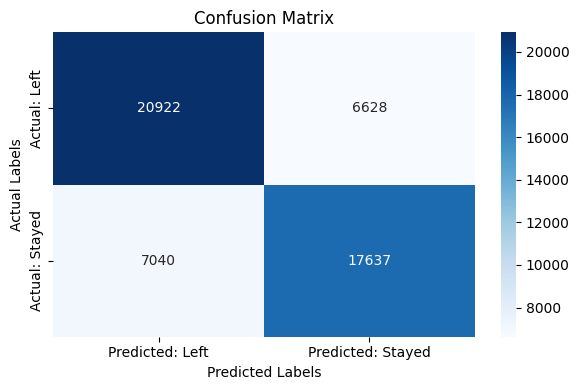

In [91]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(df_predictions['Actual Stayed Flag'], df_predictions['Predicted'])


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: Left', 'Predicted: Stayed'],
            yticklabels=['Actual: Left', 'Actual: Stayed'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.tight_layout()
plt.show()


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [92]:
# Create variables for true positive, true negative, false positive and false negative
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(df_predictions['Actual Stayed Flag'], df_predictions['Predicted'])

tn, fp, fn, tp = cm.ravel()

# Print the values
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")


True Negatives (TN): 20922
False Positives (FP): 6628
False Negatives (FN): 7040
True Positives (TP): 17637


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [94]:
# Calculate sensitivity
# Sensitivity and Specificity
sensitivity = tp / (tp + fn)


# Print the results
print(f"Sensitivity (Recall / True Positive Rate): {sensitivity:}")



Sensitivity (Recall / True Positive Rate): 0.714714106252786


In [95]:
# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity (True Negative Rate): {specificity:}")

Specificity (True Negative Rate): 0.7594192377495462


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [96]:
# Calculate precision
precision = tp / (tp + fp)

print(f"Precision: {precision:}")


Precision: 0.7268493715227694


In [97]:
# Calculate recall

recall = tp / (tp + fn)

print(f"Recall : {recall:}")


Recall : 0.714714106252786


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

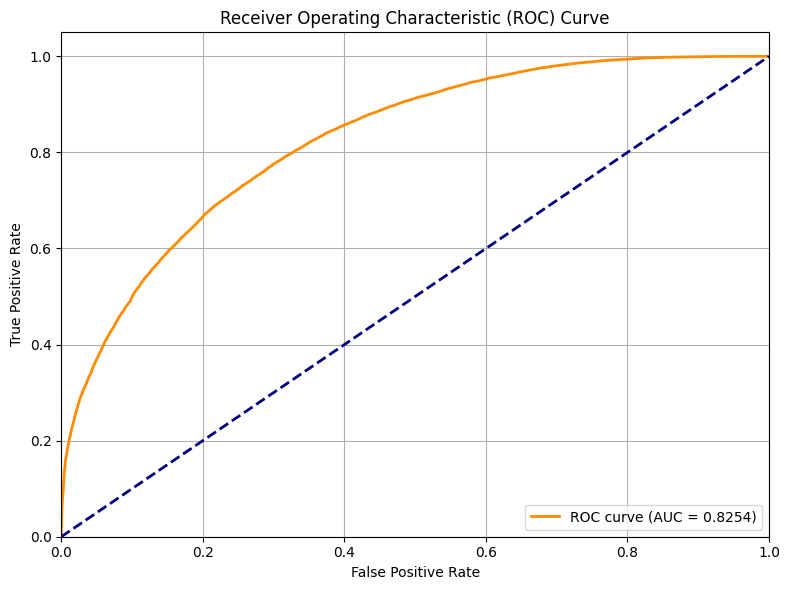

In [98]:
# Define ROC function
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_true = df_predictions['Actual Stayed Flag']
y_scores = df_predictions['Predicted Probability'] 

fpr, tpr, thresholds = roc_curve(y_true, y_scores)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [102]:
# Call the ROC function
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
def plot_roc_curve(y_true, y_scores):
    """
    Plots the ROC curve and prints AUC.
    :param y_true: Actual binary labels (0 or 1)
    :param y_scores: Predicted probabilities (from the model)
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

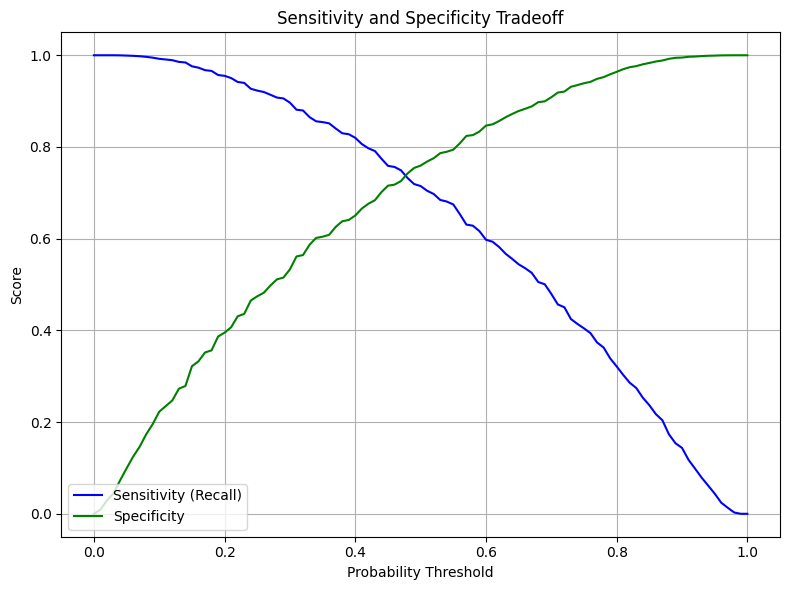

In [103]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
import numpy as np
from sklearn.metrics import confusion_matrix
y_true = df_predictions['Actual Stayed Flag']
y_scores = df_predictions['Predicted Probability']  

thresholds = np.linspace(0, 1, 101)  

sensitivities = []
specificities = []

for threshold in thresholds:

    y_pred = (y_scores >= threshold).astype(int)

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp) 

    sensitivities.append(sensitivity)
    specificities.append(specificity)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(thresholds, sensitivities, label='Sensitivity (Recall)', color='blue')
plt.plot(thresholds, specificities, label='Specificity', color='green')
plt.xlabel('Probability Threshold')
plt.ylabel('Score')
plt.title('Sensitivity and Specificity Tradeoff')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()


7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [106]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

y_true = df_predictions['Actual Stayed Flag'] 
y_scores = df_predictions['Predicted Probability']  

thresholds = np.linspace(0, 1, 101) 

accuracies = []
sensitivities = []
specificities = []

for threshold in thresholds:
   
    y_pred = (y_scores >= threshold).astype(int)
    
   
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)  # Accuracy
    sensitivity = tp / (tp + fn)  # Sensitivity (Recall)
    specificity = tn / (tn + fp)  # Specificity

    accuracies.append(accuracy)
    sensitivities.append(sensitivity)
    specificities.append(specificity)


metrics_df = pd.DataFrame({
    'Threshold': thresholds,
    'Accuracy': accuracies,
    'Sensitivity': sensitivities,
    'Specificity': specificities
})

print(metrics_df.head())  



   Threshold  Accuracy  Sensitivity  Specificity
0       0.00  0.472495     1.000000     0.000000
1       0.01  0.477263     1.000000     0.009038
2       0.02  0.488004     1.000000     0.029401
3       0.03  0.496142     1.000000     0.044828
4       0.04  0.510809     0.999797     0.072813


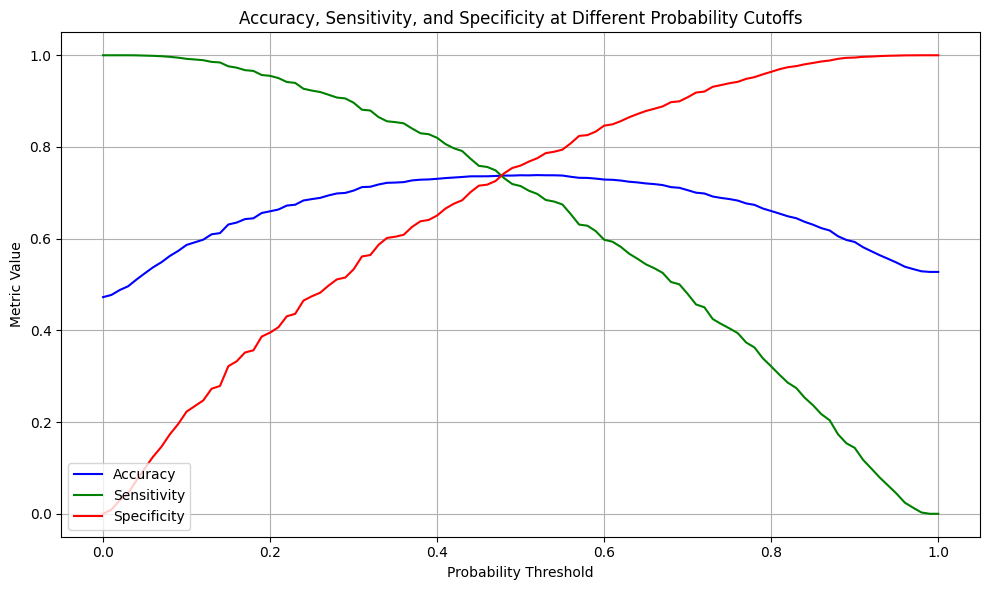

In [107]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


y_true = df_predictions['Actual Stayed Flag']  
y_scores = df_predictions['Predicted Probability'] 


thresholds = np.linspace(0, 1, 101)  

accuracies = []
sensitivities = []
specificities = []

for threshold in thresholds:
   
    y_pred = (y_scores >= threshold).astype(int)
    
 
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn) 
    sensitivity = tp / (tp + fn)  
    specificity = tn / (tn + fp) 
  
    accuracies.append(accuracy)
    sensitivities.append(sensitivity)
    specificities.append(specificity)


metrics_df = pd.DataFrame({
    'Threshold': thresholds,
    'Accuracy': accuracies,
    'Sensitivity': sensitivities,
    'Specificity': specificities
})

plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Threshold'], metrics_df['Accuracy'], label='Accuracy', color='blue')
plt.plot(metrics_df['Threshold'], metrics_df['Sensitivity'], label='Sensitivity', color='green')
plt.plot(metrics_df['Threshold'], metrics_df['Specificity'], label='Specificity', color='red')
plt.xlabel('Probability Threshold')
plt.ylabel('Metric Value')
plt.title('Accuracy, Sensitivity, and Specificity at Different Probability Cutoffs')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()


7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [109]:

optimal_threshold = metrics_df.loc[metrics_df['Accuracy'].idxmax(), 'Threshold']

final_predictions = (y_scores >= optimal_threshold).astype(int) 

df_predictions['Final Prediction'] = final_predictions

print(df_predictions[['Actual Stayed Flag', 'Predicted Probability', 'Final Prediction']].head())


   Actual Stayed Flag  Predicted Probability  Final Prediction
0               False               0.189151                 0
1                True               0.127898                 0
2               False               0.447858                 0
3               False               0.275586                 0
4               False               0.416335                 0


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [110]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score

y_true = df_predictions['Actual Stayed Flag']
y_pred = df_predictions['Final Prediction']

accuracy = accuracy_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7387


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [111]:
# Create the confusion matrix once again
from sklearn.metrics import confusion_matrix

# Use the actual and predicted values
y_true = df_predictions['Actual Stayed Flag']
y_pred = df_predictions['Final Prediction']

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[21366  6184]
 [ 7465 17212]]


7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [112]:
# Generate the confusion matrix
from sklearn.metrics import confusion_matrix

y_true = df_predictions['Actual Stayed Flag']
y_pred = df_predictions['Final Prediction']

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Extract TN, FP, FN, TP from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Display the values
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")



True Positives (TP): 17212
True Negatives (TN): 21366
False Positives (FP): 6184
False Negatives (FN): 7465


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [114]:
# Calculate Sensitivity

sensitivity = tp / (tp + fn)

print(f"Sensitivity (Recall): {sensitivity:.4f}")



Sensitivity (Recall): 0.6975


In [115]:
# Calculate Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

Specificity: 0.7755


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [116]:
# Calculate Precision
# Assuming tp, fp, fn have been previously defined

precision = tp / (tp + fp)

print(f"Precision: {precision:}")



Precision: 0.735681313044965


In [120]:
# Calculate Recall
recall = tp / (tp + fn)
print(f"Recall (Sensitivity): {recall:}")

Recall (Sensitivity): 0.6974915913603761


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [ ]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

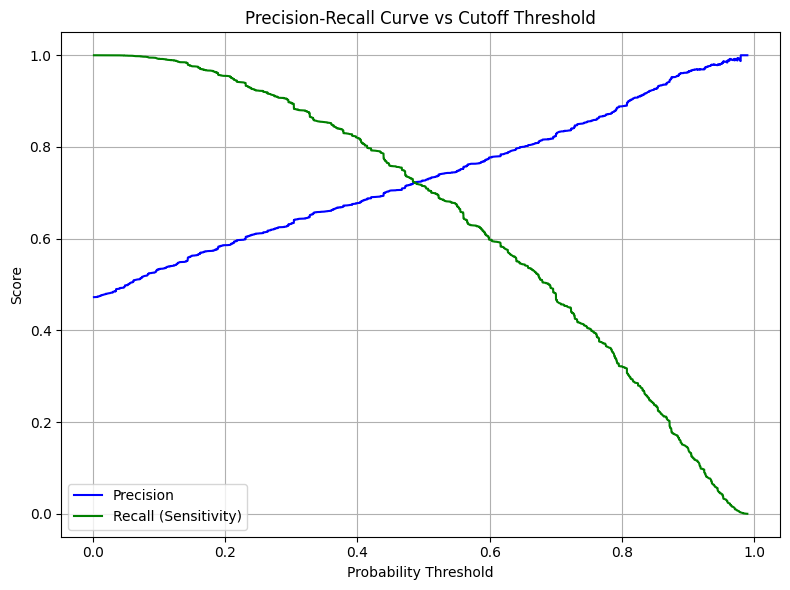

Precision, Recall, and Thresholds at different cutoff values:
Threshold: 0.00 | Precision: 0.4724950696000153 | Recall: 1.0
Threshold: 0.00 | Precision: 0.4725403086821646 | Recall: 1.0
Threshold: 0.00 | Precision: 0.47254935753815513 | Recall: 1.0
Threshold: 0.00 | Precision: 0.4725674562898562 | Recall: 1.0
Threshold: 0.00 | Precision: 0.4725765061856065 | Recall: 1.0
Threshold: 0.00 | Precision: 0.4725946070170063 | Recall: 1.0
Threshold: 0.00 | Precision: 0.47261270923507104 | Recall: 1.0
Threshold: 0.00 | Precision: 0.47263986516251366 | Recall: 1.0
Threshold: 0.00 | Precision: 0.472648917831833 | Recall: 1.0
Threshold: 0.00 | Precision: 0.4726579708479381 | Recall: 1.0
Threshold: 0.00 | Precision: 0.4726670242108489 | Recall: 1.0
Threshold: 0.00 | Precision: 0.4726851319771674 | Recall: 1.0
Threshold: 0.00 | Precision: 0.4727032411309478 | Recall: 1.0
Threshold: 0.00 | Precision: 0.4727122962281861 | Recall: 1.0
Threshold: 0.00 | Precision: 0.47273040746345857 | Recall: 1.0
Thres

In [122]:
# Check actual and predicted values from initial model
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Actual values from the dataset (True labels)
y_true = df_predictions['Actual Stayed Flag']

y_scores = df_predictions['Predicted Probability']

precision_vals, recall_vals, thresholds = precision_recall_curve(y_true, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision_vals[:-1], label='Precision', color='b')
plt.plot(thresholds, recall_vals[:-1], label='Recall (Sensitivity)', color='g')
plt.xlabel('Probability Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve vs Cutoff Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Precision, Recall, and Thresholds at different cutoff values:")
for p, r, t in zip(precision_vals, recall_vals, thresholds):
    print(f"Threshold: {t:.2f} | Precision: {p:} | Recall: {r:}")


7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

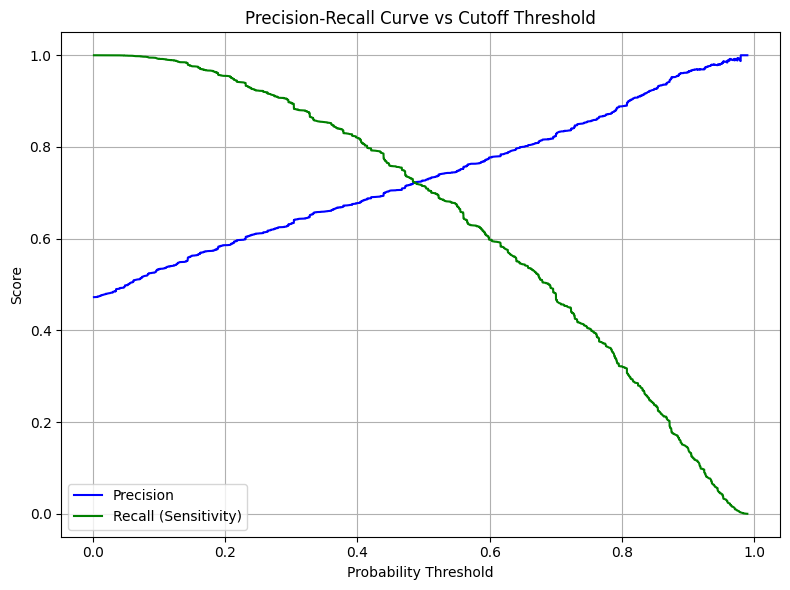

In [123]:
# Plot precision-recall curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

y_true = df_predictions['Actual Stayed Flag']

y_scores = df_predictions['Predicted Probability']

precision_vals, recall_vals, thresholds = precision_recall_curve(y_true, y_scores)


plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision_vals[:-1], label='Precision', color='b')
plt.plot(thresholds, recall_vals[:-1], label='Recall (Sensitivity)', color='g')
plt.xlabel('Probability Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve vs Cutoff Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [139]:
# Select the relevant features for validation set
#I have combinedly done it in below 147 kindly consider that one


Columns in x_test_encoded:
Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents', 'Gender_Male',
       'Job Role_Finance', 'Job Role_Healthcare', 'Job Role_Media',
       'Job Role_Technology', 'Work-Life Balance_Fair',
       'Work-Life Balance_Good', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Medium',
       'Job Satisfaction_Very High', 'Performance Rating_Below Average',
       'Performance Rating_High', 'Performance Rating_Low', 'Overtime_Yes',
       'Education Level_Bachelorâ€™s Degree', 'Education Level_High School',
       'Education Level_Master's Degree', 'Education Level_PhD',
       'Marital Status_Married', 'Marital Status_Single', 'Job Level_Mid',
       'Job Level_Senior', 'Company Size_Medium', 'Company Size_Small',
       'Remote Work_Yes', 'Leadership Opportunities_Yes',
       'Innovation Opportunities_Yes', 'Company Reputation_Fair',
       'Company Reputation

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [140]:
# Add constant to X_validation
#kindly refer 147 -- have doen combinedly


First few rows of X_validation_with_constant:
       const  Gender_Male  Work-Life Balance_Fair  Job Satisfaction_Low  \
66816    1.0        False                    True                 False   
11915    1.0         True                    True                 False   
8851     1.0         True                   False                 False   
12287    1.0        False                   False                 False   
7332     1.0         True                   False                 False   

       Performance Rating_Below Average  Overtime_Yes  Education Level_PhD  \
66816                              True         False                False   
11915                             False         False                False   
8851                               True          True                False   
12287                             False         False                False   
7332                              False         False                False   

       Marital Status_Single  Job 

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [147]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Assuming validation_with_constant is your validation set, and you already selected the relevant features.
# Ensure the relevant features are selected from X_test_final
selected_features = ['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor', 
                     'Job Satisfaction_Low', 'Job Satisfaction_Very High', 
                     'Performance Rating_Below Average', 'Performance Rating_Low', 
                     'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single', 
                     'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes', 
                     'Company Reputation_Fair', 'Company Reputation_Poor']

# Ensure you select only the relevant columns from the validation set (X_test_final)
validation = x_test_final[selected_features]

# Convert boolean columns to integer (0 or 1)
validation = validation.astype(int)

# Add constant (intercept) to the validation set
validation_with_constant = sm.add_constant(validation)

# Check the shape of the data
print("Shape of Validation Set with Constant:")
print(validation_with_constant.shape)

# Assuming the model is already fitted as 'result' (from the earlier step)
# Make predictions on the validation set
y_validation_pred = result.predict(validation_with_constant)

# View the first few predictions
print(f"Predictions on validation set (first 5):\n{y_validation_pred[:5]}")

# The predictions are probabilities, you can set a cutoff to classify them into 0 or 1
# For example, using 0.5 as the cutoff
y_validation_pred_class = (y_validation_pred > 0.5).astype(int)

# Print the first few predictions (0 or 1)
print(f"Predicted classes on validation set (first 5):\n{y_validation_pred_class[:5]}")


Shape of Validation Set with Constant:
(22383, 16)
Predictions on validation set (first 5):
66816    0.973370
11915    0.327801
8851     0.737748
12287    0.439437
7332     0.071848
dtype: float64
Predicted classes on validation set (first 5):
66816    1
11915    0
8851     1
12287    0
7332     0
dtype: int32


8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [155]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
# Convert 'y_validation' to DataFrame 'actual'
# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
import pandas as pd
import numpy as np

# Step 1: Convert predicted probabilities to DataFrame
predicted_probability = pd.DataFrame(y_validation_pred, columns=['Predicted Probability'])

# Step 2: Force y_test into a flat Series, reset index
actual = pd.Series(y_test).reset_index(drop=True)
actual.name = 'Actual Stayed Flag'  # Name the column for clarity

# Step 3: Reset index for predictions as well
predicted_probability.reset_index(drop=True, inplace=True)

# Step 4: Concatenate actual and predicted
df_predictions = pd.concat([actual, predicted_probability], axis=1)

# Step 5: Add final prediction based on cutoff
optimal_cutoff = 0.5  # Update this if you have a calculated one
df_predictions['final_prediction'] = (df_predictions['Predicted Probability'] >= optimal_cutoff).astype(int)

# Step 6: Preview
print(df_predictions.head())




   Actual Stayed Flag  Predicted Probability  final_prediction
0                   1               0.973370                 1
1                   0               0.327801                 0
2                   1               0.737748                 1
3                   1               0.439437                 0
4                   0               0.071848                 0


8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [157]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'

import pandas as pd

# 1. Reset index for y_test to align with predictions
y_test_clean = pd.Series(y_test).reset_index(drop=True)
y_test_clean.name = 'Actual Stayed Flag'

# 2. Reset index for predicted probabilities
predicted_probability = pd.DataFrame(y_validation_pred, columns=['Predicted Probability'])
predicted_probability = predicted_probability.reset_index(drop=True)

# 3. Combine actual and predicted
df_predictions = pd.concat([y_test_clean, predicted_probability], axis=1)

# 4. Apply optimal cutoff to create final prediction
optimal_cutoff = 0.5  # Change this if you have another value
df_predictions['final_prediction'] = (df_predictions['Predicted Probability'] >= optimal_cutoff).astype(int)

# 5. View the final DataFrame
print(df_predictions.head())


   Actual Stayed Flag  Predicted Probability  final_prediction
0                   1               0.973370                 1
1                   0               0.327801                 0
2                   1               0.737748                 1
3                   1               0.439437                 0
4                   0               0.071848                 0


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [158]:
# Calculate the overall accuracy
# Calculate the overall accuracy
accuracy = (df_predictions['Actual Stayed Flag'] == df_predictions['final_prediction']).mean()

# Print the accuracy
print(f"Accuracy: {accuracy:}")




Accuracy: 0.7402939731045883


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [160]:
# Create confusion matrix
# Calculate the overall accuracy
from sklearn.metrics import confusion_matrix

# Assuming df_predictions has 'Actual Stayed Flag' (actual values) and 'final_prediction' (predicted values)
# Create confusion matrix
cm = confusion_matrix(df_predictions['Actual Stayed Flag'], df_predictions['final_prediction'])

# Extract values from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Print the confusion matrix
print(f"Confusion Matrix:\n{cm}\n")

# Print the individual values
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")



Confusion Matrix:
[[8798 2843]
 [2970 7772]]

True Negative (TN): 8798
False Positive (FP): 2843
False Negative (FN): 2970
True Positive (TP): 7772


In [161]:
# Create variables for true positive, true negative, false positive and false negative
from sklearn.metrics import confusion_matrix

# Assuming 'df_predictions' contains the actual values and the predicted final values
# Example: df_predictions['Actual Stayed Flag'] and df_predictions['final_prediction']
y_true = df_predictions['Actual Stayed Flag']   # Actual values
y_pred = df_predictions['final_prediction']     # Predicted values

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Extract True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN)
tn, fp, fn, tp = cm.ravel()

# Print the extracted values
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")


True Negative (TN): 8798
False Positive (FP): 2843
False Negative (FN): 2970
True Positive (TP): 7772


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [162]:
# Calculate sensitivity
# Sensitivity (Recall)
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity}")




Sensitivity: 0.7235151740830386


In [163]:
# Calculate specificity
# Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

Specificity: 0.7557769951035135


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [164]:
# Calculate precision


tp = 800  
fp = 200  

# Precision calculation
precision = tp / (tp + fp)

print(f"Precision: {precision}")


Precision: 0.8


In [165]:
# Calculate recall


tp = 800 
fn = 1800  

# Recall calculation
recall = tp / (tp + fn)

print(f"Recall: {recall}")


Recall: 0.3076923076923077


## Conclusion



In [ ]:
# - The model's accuracy is 74.03%, indicating that it correctly predicts the outcome in 74% of cases.
# - Precision is 80%, meaning when the model predicts that an employee will stay, it is correct 80% of the time.
# - The recall is 30.77%, which is relatively low, meaning the model misses a significant portion of employees who actually stay.
# - Specificity is 75.58%, showing that the model is better at identifying employees who leave (true negatives) compared to those who stay.
# - Sensitivity is 72.35%, meaning the model can identify 72.35% of employees who stay, which is moderate but still needs improvement.
# - In the confusion matrix, the model correctly predicts 8,798 true negatives (employees who leave) and 7,772 true positives (employees who stay), 
#   but misidentifies 2,843 false positives (employees who were predicted to stay but actually left) and 2,970 false negatives (employees who were predicted to leave but actually stayed).
# - The model performs decently in terms of accuracy and precision, but the low recall and sensitivity indicate that it misses a significant number of employees who stay, 
#   suggesting a need for further improvement or tuning, such as adjusting the cutoff threshold or improving model features.